In [1]:
from sklearn.decomposition import PCA

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import silhouette_samples
from sklearn import cluster
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from scipy.spatial import distance
import collections
import datetime
import time

In [34]:
df = pd.read_csv('degrees-that-pay-back.csv')

In [35]:
df_target = pd.DataFrame(df, columns=['Undergraduate Major'])

In [36]:
df_1 = pd.DataFrame(df, columns=['Starting Median Salary','Mid-Career Median Salary','Percent change from Starting to Mid-Career Salary','Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary'])
df_target = np.concatenate(df_target.as_matrix())


In [37]:
Kmean_score = np.zeros((20,1))

92428180517.5
34584213681.1
21980561808.0
16913669969.2
12708890747.5
11180489243.5
8763198455.97
7926428809.37
7153886070.16
6387713940.33
5887200090.58
5137956302.5
4364917077.27
3727118017.98
3126520619.87
2554925045.08
2125211479.24
1928337997.07
1878244254.38
1688123399.21


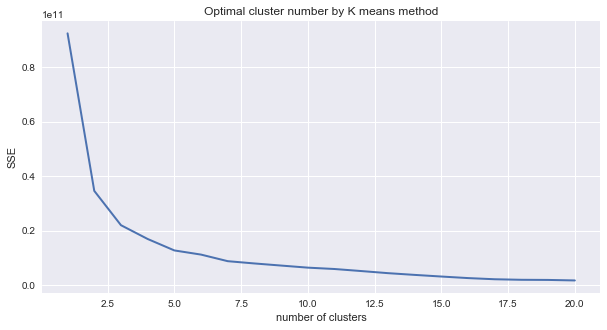

In [38]:
for i in range(20):
    k_means = cluster.KMeans(n_clusters=i+1, random_state=0).fit(df_1)
    print k_means.inertia_
    Kmean_score[i] = k_means.inertia_
Kmean_score = np.concatenate(Kmean_score)

      
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,21), Kmean_score, lw=2)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('Optimal cluster number by K means method',fontsize=12)
plt.show()

In [30]:
print("Normalized mutual information score is %.8s." % (normalized_mutual_info_score(k_1.labels_)))  
print("V-measure score is %.8s." % (v_measure_score(k_1.labels_)))
SS_value = [silhouette_samples(df_1,k_1.labels_),k_1.labels_]
SS_value = pd.DataFrame(SS_value)
SS_value = np.array(SS_value.T.sort_values(by=[1], ascending=[True]).drop([1],1))
cluster_num = [0]*len(collections.Counter(k_1.labels_))
for i in range(len(cluster_num)):
    cluster_num[i] = collections.Counter(k_1.labels_)[i]
cluster_cum = np.cumsum(cluster_num)
ran = len(cluster_cum)
for i in range(ran):
    if i == 0:
        print(np.mean(SS_value[0:cluster_cum[i]]))
    else:
        print(np.mean(SS_value[cluster_cum[i-1]:cluster_cum[i]]))

print("SSE is %.8s." % (k_1.inertia_))
cluster_percentage = [0]*5
print()
print('Percentage of clusters')
for i in range(5):
    print(collections.Counter(k_1.labels_)[i]*100/297)

TypeError: normalized_mutual_info_score() takes exactly 2 arguments (1 given)